# Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

1. Загрузите файл HR.csv в pandas dataframe.
2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.
   Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
    - Доля сотрудников с повышением за последние лет.
    - Средняя степень удовлетворенности.
    - Среднее количество проектов.
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.
10. Загрузить jupyter notebook с решением на github и прислать ссылку.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

# 1. Загрузите файл HR.csv в pandas dataframe.

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.Work_accident.unique()

array([0, 1])

In [5]:
data.left.unique()

array([1, 0])

In [6]:
data.promotion_last_5years.unique()

array([0, 1])

In [7]:
data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

# 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [9]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
print('Значение моды для satisfaction_level:', data.satisfaction_level.mode()[0])
print('Значение моды для last_evaluation:', data.last_evaluation.mode()[0])
print('Значение моды для number_project:', data.number_project.mode()[0])
print('Значение моды для average_montly_hours:', data.average_montly_hours.mode()[0])
print('Значение моды для time_spend_company:', data.time_spend_company.mode()[0])
print('Значение моды для Work_accident:', data.Work_accident.mode()[0])
print('Значение моды для left:', data.left.mode()[0])
print('Значение моды для promotion_last_5years:', data.promotion_last_5years.mode()[0])

Значение моды для satisfaction_level: 0.1
Значение моды для last_evaluation: 0.55
Значение моды для number_project: 4
Значение моды для average_montly_hours: 135
Значение моды для time_spend_company: 3
Значение моды для Work_accident: 0
Значение моды для left: 0
Значение моды для promotion_last_5years: 0


In [11]:
# посмотрела на перспективы роста в компании
why_soo_bad = data.groupby(['time_spend_company', 'promotion_last_5years']).count()['satisfaction_level'].reset_index()
#why_soo_bad

Комментарии:

Ввиду того, что данные в столбцах work_accident, left и promotion_last_5years являются категориальными, расчет показателей для них нерепрезентативен.

Также предположим, что признаки категориальных данных подразумевают:
- work_accident (происходили ли несчастные случаи на рабочем месте с сотрудником): 0 - Нет, 1 - Да
- left (уволился ли сотрудник): 0 - Нет, 1 - Да
- promotion_last_5years (повышался ли сотрудник за последние пять лет): 0 - Нет, 1 - Да

В разрезе рассчитанных показателей можно отметить:
- довольно низкий уровень удовлетворенности работой - медиана = 0,64, среднеарифметическое = 0,61, при этом мода всего 0,1
- одной из причин низкой удовлетворенности м.б. практически никакие перспективы роста в компании - только 2% сотрудников от общего числа за последние 5 лет были повышены
- думаю отсутствие перспектив роста также м.б. причиной того, что люди в компании не особо задерживаются - большая часть сотрудников работает в компании не более 4 лех, в т.ч. 25% менее 2-х лет, однако это не однозначно, нужно также смотреть на возраст сотрудников и их квалификацию и опыт, т.к. про з/п мы знаем только относительный уровень высокая/средняя/низкая, но не знаем уровень в денежном выражении. также срок работы м.б. связан с проектным профилем работы компании, но тогда скорее всего мы бы имели дело с аутсорсингом и сотрудники были бы не в периметре компании. 
- в части проектов нагрузка довольно равномерная - 4 проекта по моде и медиане
- по средней продолжительности рабочего дня - среднеарифметическая и медиана говорят о том, что в среднем сотрудники задерживаются примерно на час ежедневно, что, на мой взгляд, довольно комфортно, но судя по моде и 1 квартилю часть сотрудников работает неполный рабочий день (мода - 135 ч/мес, 1квартиль - 156 ч/мес), а половина сотрудников компании имеет значительно ненормированный рабочий день, в т.ч. 25% сотрудников проводят на работе более 40% от стандартного рабочего дня (возможно конечно, опять таки с учетом проектного профиля, что это работа в выходные и часы посчитаны по тарифу 2х или 3х).

Знание компании здесь бы сильно помогло, т.к. выводы м.б. как очень негативными без данных о предмете изучения, так и вполне приемлемыми в зависимости от ситуации.

# 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [12]:
# Количественные переменные:
variable_data = data.loc[:, ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
variable_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [13]:
#sns.pairplot(variable_data)

In [14]:
variable_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [15]:
variable_data.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


In [16]:
variable_data.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


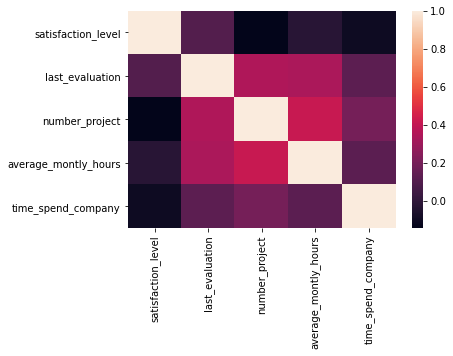

In [17]:
sns.heatmap(variable_data.corr())

In [18]:
variable_data[['number_project', 'average_montly_hours']].corr(method='kendall')

,number_project,average_montly_hours
number_project,1.000000,0.306987
average_montly_hours,0.306987,1.000000


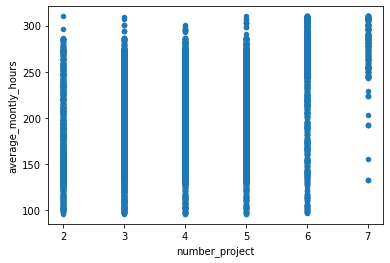

In [19]:
variable_data.plot(kind='scatter', x='number_project', y='average_montly_hours')

Text(0.5, 1.0, 'Correlation between Average monthly hours and Number project')

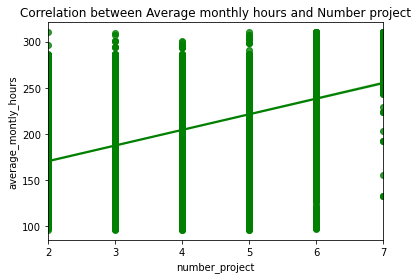

In [20]:
ax = sns.regplot(data=variable_data, x='number_project', y='average_montly_hours', color='green', marker='o')
ax.set_title('Correlation between Average monthly hours and Number project')

Text(0.5, 1.0, 'Correlation between Time spend company and Satisfaction level')

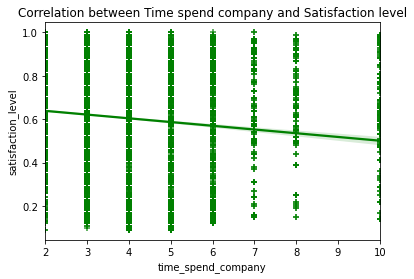

In [21]:
ax = sns.regplot(data=variable_data, x='time_spend_company', y='satisfaction_level', color='green', marker='+')
ax.set_title('Correlation between Time spend company and Satisfaction level')

In [22]:
variable_data[['satisfaction_level', 'number_project']].corr(method='kendall')

,satisfaction_level,number_project
satisfaction_level,1.000000,0.022077
number_project,0.022077,1.000000


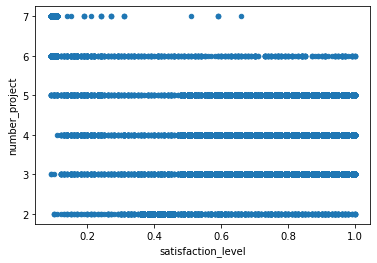

In [23]:
variable_data.plot(kind='scatter', x='satisfaction_level', y='number_project')

Text(0.5, 1.0, 'Correlation between Number project and Satisfaction level')

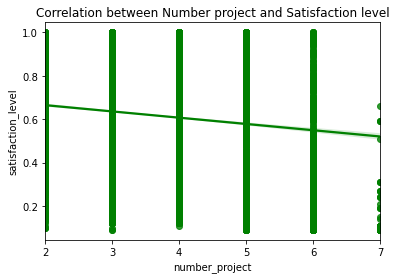

In [24]:
ax = sns.regplot(data=variable_data, x='number_project', y='satisfaction_level', color='green', marker='o')
ax.set_title('Correlation between Number project and Satisfaction level')

Комментарии:

В целом, корреляция данных может быть оценена как довольно слабая, о чем свидетельствуют рассчитанные коэффициенты корреляции.
Двумя самыми скоррелированными переменными являются: Количество проектов, выполненных за время работы и Среднее количество часов на рабочем месте в месяц - что логично, хотя корелляция довольно слабая - 0.31 по Кенделлу и 0.42 по Пирсону и 0.40 по Спирмену.
В число двух наименее скоррелированных переменных вошли: Количество проектов, выполненных за время работы и Уровень удовлетворенности работой - коэффициент корреляции по Кенделлу = 0.02, по Пирсону = -0.14, по Спирмену = 0.00
Также стоит отметить отрицательный коэффициент корреляции (по всем 3-м методам) между Уровенем удовлетворенности работой и Стажем работы в компании в годах.

# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [25]:
department = data.groupby('department').count()[['satisfaction_level']].sort_values('satisfaction_level', ascending=False).reset_index()
department.rename(columns = {'satisfaction_level':'employees_number'}, inplace = True)
department['share,%'] = (department['employees_number'] / department['employees_number'].sum()*100).round(2)
department.head(15)

,department,employees_number,"share,%"
0,sales,4140,27.60
1,technical,2720,18.13
2,support,2229,14.86
3,IT,1227,8.18
4,product_mng,902,6.01
5,marketing,858,5.72
6,RandD,787,5.25
7,accounting,767,5.11
8,hr,739,4.93
9,management,630,4.20


# 5. Показать распределение сотрудников по зарплатам.

In [26]:
salary = data.groupby('salary').count()[['satisfaction_level']].sort_values('satisfaction_level', ascending=False).reset_index()
salary.rename(columns = {'satisfaction_level':'employees_number'}, inplace = True)
salary.head()

,salary,employees_number
0,low,7316
1,medium,6446
2,high,1237


# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [27]:
department_salary = data.groupby(['department', 'salary']).count()['satisfaction_level'].reset_index()
department_salary.rename(columns = {'satisfaction_level':'employees_number'}, inplace = True)
department_salary.head(10)

,department,salary,employees_number
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [28]:
def groupby_high_salary(row):
    if 'high' in row['salary']:
        return row['employees_number']

In [29]:
def groupby_low_salary(row):
    if 'low' in row['salary']:
        return row['employees_number']

In [30]:
def groupby_medium_salary(row):
    if 'medium' in row['salary']:
        return row['employees_number']

In [31]:
department_salary['high_salary'] = department_salary.apply(groupby_high_salary, axis = 1)
department_salary['medium_salary'] = department_salary.apply(groupby_medium_salary, axis = 1)
department_salary['low_salary'] = department_salary.apply(groupby_low_salary, axis = 1)
department_salary.head()

,department,salary,employees_number,high_salary,medium_salary,low_salary
0,IT,high,83,83.0,NaN,NaN
1,IT,low,609,NaN,NaN,609.0
2,IT,medium,535,NaN,535.0,NaN
3,RandD,high,51,51.0,NaN,NaN
4,RandD,low,364,NaN,NaN,364.0


In [32]:
department_salary.drop(['salary', 'employees_number'], axis='columns', inplace=True)
department_salary.head()

,department,high_salary,medium_salary,low_salary
0,IT,83.0,NaN,NaN
1,IT,NaN,NaN,609.0
2,IT,NaN,535.0,NaN
3,RandD,51.0,NaN,NaN
4,RandD,NaN,NaN,364.0


In [33]:
df_high_salary = department_salary.loc[department_salary['high_salary'] > 0].drop(['medium_salary', 'low_salary'], axis='columns')
df_medium_salary = department_salary.loc[department_salary['medium_salary'] > 0].drop(['high_salary', 'low_salary'], axis='columns')
df_low_salary = department_salary.loc[department_salary['low_salary'] > 0].drop(['high_salary', 'medium_salary'], axis='columns')
df_high_salary = df_high_salary.merge(df_medium_salary, on='department', how='left')
df_high_salary = df_high_salary.merge(df_low_salary, on='department', how='left')

df_high_salary.head(10)

,department,high_salary,medium_salary,low_salary
0,IT,83.0,535.0,609.0
1,RandD,51.0,372.0,364.0
2,accounting,74.0,335.0,358.0
3,hr,45.0,359.0,335.0
4,management,225.0,225.0,180.0
5,marketing,80.0,376.0,402.0
6,product_mng,68.0,383.0,451.0
7,sales,269.0,1772.0,2099.0
8,support,141.0,942.0,1146.0
9,technical,201.0,1147.0,1372.0


In [34]:
df_high_salary['high_salary'].sum()+df_high_salary['medium_salary'].sum()+df_high_salary['low_salary'].sum()

14999.0

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [35]:
time_to_salary = data.groupby('salary').agg({'average_montly_hours': ['sum']})['average_montly_hours']['sum'].reset_index()
time_to_salary.head()

,salary,sum
0,high,247236
1,low,1470491
2,medium,1297827


In [36]:
time_to_salary_and_employees_number = salary.merge(time_to_salary, on='salary', how='left')
time_to_salary_and_employees_number.head()

,salary,employees_number,sum
0,low,7316,1470491
1,medium,6446,1297827
2,high,1237,247236


In [37]:
#data.average_montly_hours.sum()

In [38]:
#time_to_salary_and_employees_number['sum'].sum()

In [39]:
time_to_salary_and_employees_number['mean_time'] = (time_to_salary_and_employees_number['sum'] / time_to_salary_and_employees_number['employees_number']).round(1)
time_to_salary_and_employees_number.head()

,salary,employees_number,sum,mean_time
0,low,7316,1470491,201.0
1,medium,6446,1297827,201.3
2,high,1237,247236,199.9


In [40]:
low = data[(data['salary'] == 'low')]
low.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000
mean,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
std,0.254594,0.173261,1.281822,50.832214,1.303818,0.349232,0.456916,0.094558
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.420000,0.550000,3.000000,155.000000,3.000000,0.000000,0.000000,0.000000
50%,0.630000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,246.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [41]:
print('Мода для average_montly_hours с низкой з/п:', low.average_montly_hours.mode()[0])

Мода для average_montly_hours с низкой з/п: 135


In [42]:
high = data[(data['salary'] == 'high')]
high.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000
mean,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
std,0.226791,0.158608,1.088684,47.710446,1.977885,0.362255,0.248888,0.234226
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.500000,0.570000,3.000000,161.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.700000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.840000,5.000000,241.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,307.000000,10.000000,1.000000,1.000000,1.000000


In [43]:
print('Мода для average_montly_hours с высокой з/п:', low.average_montly_hours.mode()[0])

Мода для average_montly_hours с высокой з/п: 135


Комментарий:

Если исходить из расчета среднего времени в месяц на одного сотрудника с высокой и низкой з/п соответственно, то разница в количестве времени совсем незначительна и составляет менее 1%, с перевесом в пользу сотрудников в высоким окладом. При этом, исходя из значений моды, можно предположить, что среди сотрудников с высокой з/п чаще встречаются те, кто проводит на работе больше времени.

# 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние лет.
- Средняя степень удовлетворенности.
- Среднее количество проектов.

In [44]:
left_ = data.groupby('left').agg({'promotion_last_5years': ['sum', 'count'], 'satisfaction_level': 'mean', 'number_project': 'mean'}).reset_index()
left_.head()

left promotion_last_5years        satisfaction_level number_project
                         sum  count               mean           mean
0    0                   300  11428           0.666810       3.786664
1    1                    19   3571           0.440098       3.855503

In [45]:
new = pd.DataFrame()
new['left'] = left_.loc[:,('left')] 
new['employees_promoted_last_5years']= left_.loc[:,('promotion_last_5years','sum')]
new['total_employees'] = left_.loc[:,('promotion_last_5years','count')]
new['promoted_employees_%'] = (left_['promotion_last_5years']['sum'] / left_['promotion_last_5years']['count'] *100).round(2)
new['mean_satisfaction_level'] = left_.loc[:,('satisfaction_level','mean')].round(2)
new['mean_number_project'] = left_.loc[:,('number_project','mean')].round(2)
new.loc[new['left'] == 0, 'left'] = 'No'
new.loc[new['left'] == 1, 'left'] = 'Yes'
new

,left,employees_promoted_last_5years,total_employees,promoted_employees_%,mean_satisfaction_level,mean_number_project
0,No,300,11428,2.63,0.67,3.79
1,Yes,19,3571,0.53,0.44,3.86


Комментарий:

Уволившиеся сотрудники практически не повышались за последние 5 лет, их уровень удовлетворенности ниже среднего, число проектов, в принципе, такое же как у действующих сотрудников.
Оставшиееся в компании сотрудники демонстрируют более высокий уровень удовлетворенности, но при этом также редко поощеряются продвижением по службе.

In [46]:
data.left.sum()
#data.left.count()

3571

In [47]:
data.promotion_last_5years.sum()
#data.promotion_last_5years.count()

319

# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [48]:
df=data.loc[:, ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


In [49]:
# разделяем выборку на признаки и классы
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [50]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=333)

In [51]:
lda = LinearDiscriminantAnalysis()

In [52]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [53]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)
#np.unique(lda.predict(X_test))
#len(lda.predict(X_test))

array([0, 0, 0, ..., 0, 1, 0])

In [54]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.to_numpy().ravel(), lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4495,0,0
4496,0,0
4497,0,0
4498,1,1


In [55]:
from sklearn.metrics import accuracy_score 

In [56]:
accuracy_score(y_test, lda.predict(X_test))

0.7673333333333333

In [57]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.48874390e+00,  7.37336745e-01, -2.40346058e-01,
         4.46664436e-03,  2.27249548e-01, -1.12451824e+00,
        -1.11155843e+00]])

# Попробуем выделить основные признаки, влияющие на классификацию

In [58]:
# создаем экземпляр класса RFE с указанием оценщика и количества признаков, которые будут отобраны
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=3)

In [59]:
# создаем экземпляр модели, которую хотим использовать
model = GradientBoostingClassifier()

In [60]:
# используем Pipeline для преобразования данных
# в Pipeline мы указываем rfe для шага отбора признаков и модель, которая будет использоваться на следующем шаге
pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])

In [61]:
# define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

In [62]:
# evaluate model
n_scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9655778836987607

In [63]:
# используем пайплайн на наборе данных
pipe.fit(X_train, y_train)

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(),
                     n_features_to_select=3)),
                ('Model', GradientBoostingClassifier())])

In [64]:
# проверим support и ранжирование. Support указывает на то был выбран признак или нет
rfe.support_

array([ True,  True, False, False,  True, False, False])

In [65]:
pd.DataFrame(rfe.support_,index=X.columns,columns=['Rank'])

,Rank
satisfaction_level,True
last_evaluation,True
number_project,False
average_montly_hours,False
time_spend_company,True
Work_accident,False
promotion_last_5years,False


In [66]:
rf_df = pd.DataFrame(rfe.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head(7)

,Rank
satisfaction_level,1
last_evaluation,1
time_spend_company,1
number_project,2
average_montly_hours,3
Work_accident,4
promotion_last_5years,5


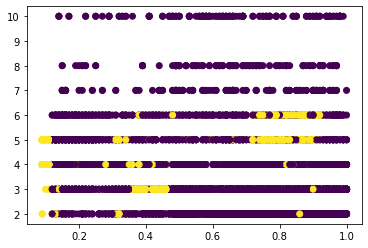

In [67]:
# визуализируем дискриминантную линию по 2 признакам
plt.scatter(X_train['satisfaction_level'], X_train['time_spend_company'], c=y_train)
plt.show()

In [68]:
small_train = X_train[(y_train == 0) | (y_train == 1)]
small_train = small_train[['satisfaction_level', 'time_spend_company']]
small_test = X_test[(y_test == 0) | (y_test == 1)]
small_test = small_test[['satisfaction_level', 'time_spend_company']]

In [69]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [70]:
# посмотрим на наши центроиды
lda_small.means_

array([[0.6667832 , 3.36921529],
       [0.44102081, 3.86650962]])

In [71]:
from matplotlib import colors

In [72]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

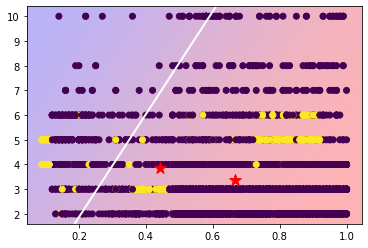

In [73]:
# сам scatter plot
plt.scatter(small_test['satisfaction_level'], small_test['time_spend_company'], c=y_test)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [74]:
# Уровень удовлетворенности работой гораздо важнее Стажа работы в компании 
lda_small.coef_

array([[-4.21706463,  0.2026899 ]])

In [75]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.766